In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=75
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'font.sans-serif':'Arial'})

In [2]:
fitDF = pd.read_csv('Fitting/mirnn/mirnn_fit.csv')
colors = list(mpl.colors.TABLEAU_COLORS)

In [4]:
AllSpecies = ['AC','BA','BC','BL','BT','BV','CC','DF','wt','delarc','parc-','parc+']
AllConditions = ['mono','comm11wtaTc','comm11delarcaTc','comm11parc','comm11parcaTc','comm']
ConditionNames = ['Mono','Comm WT','Comm delarc','Comm parc-','Comm parc+','Comm']


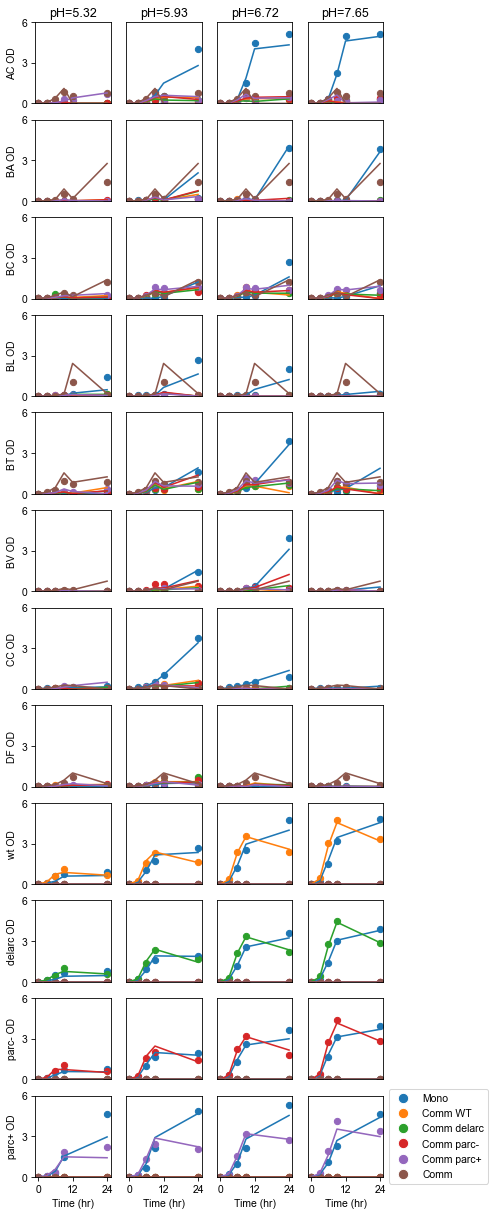

In [10]:
fig,ax = plt.subplots(len(AllSpecies),4, figsize=(6,20))
Exptime = [0,3,6,9,12,24]

AllExp = list(fitDF['Experiments'])

for spnum,species in enumerate(AllSpecies):
    for pHnum,pH in enumerate([5,6,7,8]):
        for condnum,cond in enumerate(AllConditions):
            Exp = str(pH)+cond
            if cond == 'mono':
                Exp = species+'_pH'+str(pH)
            if cond == 'comm':
                Exp = 'comm11'

            Expnum = AllExp.index(Exp)
            Exptime = [0,3,6,9,12,24]
            
            
            true = list(fitDF[species+'_OD true'])[Expnum:Expnum+6]
            pred = list(fitDF[species+'_OD pred'])[Expnum:Expnum+6]
            
            if species == 'wt' or species == 'delarc' or species == 'parc-' or species == 'parc+':
                true = list(fitDF[species+'_OD true'])[Expnum:Expnum+5]
                pred = list(fitDF[species+'_OD pred'])[Expnum:Expnum+5]
                Exptime = [0,3,6,9,24]
            
            ax[spnum][pHnum].scatter(Exptime,true,c=colors[condnum])
            ax[spnum][pHnum].plot(Exptime,pred,c=colors[condnum])
            
            ax[spnum][pHnum].set_ylim((0,6))
            ax[spnum][pHnum].set_yticks([])
            ax[spnum][pHnum].set_xticks([])
            

species_legend_elements =[
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[0],markerfacecolor=colors[0], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[1],markerfacecolor=colors[1], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[2],markerfacecolor=colors[2], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[3],markerfacecolor=colors[3], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[4],markerfacecolor=colors[4], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[5],markerfacecolor=colors[5], markersize=10),
    
    ]

plt.legend(handles=species_legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

for spnum,species in enumerate(AllSpecies):
    ax[spnum][0].set_ylabel(species+' OD')
    ax[spnum][0].set_yticks([0,3,6])
    
for pHnum,pH in enumerate([5.32,5.93,6.72,7.65]):
    ax[0][pHnum].set_title('pH='+str(pH))
    ax[-1][pHnum].set_xticks([0,12,24])
    ax[-1][pHnum].set_xlabel('Time (hr)')
    
plt.savefig('MiRNN_timeseries_fit.svg')